importing libieries

In [633]:
import pandas as pn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix



In [634]:
data=pn.read_csv('/content/train.csv')


In [635]:
data=data.drop("id" ,axis=1)

In [636]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,36.0,0,0,Yes,Private,Rural,67.29,36.7,formerly smoked,0
1,Female,34.0,0,0,Yes,Private,Rural,83.53,48.5,formerly smoked,0
2,Male,60.0,0,0,Yes,Private,Rural,65.16,30.8,never smoked,0
3,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
4,Male,76.0,0,0,Yes,Private,Urban,58.65,25.6,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...
4083,Female,53.0,1,0,Yes,Govt_job,Rural,98.61,38.8,smokes,0
4084,Female,61.0,0,0,Yes,Private,Rural,72.01,26.0,formerly smoked,0
4085,Male,44.0,0,0,Yes,Private,Rural,94.71,28.4,smokes,0
4086,Male,21.0,0,0,No,Private,Urban,120.94,29.7,formerly smoked,0


In [637]:
data.head(1022)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,36.0,0,0,Yes,Private,Rural,67.29,36.7,formerly smoked,0
1,Female,34.0,0,0,Yes,Private,Rural,83.53,48.5,formerly smoked,0
2,Male,60.0,0,0,Yes,Private,Rural,65.16,30.8,never smoked,0
3,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
4,Male,76.0,0,0,Yes,Private,Urban,58.65,25.6,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...
1017,Female,32.0,0,0,Yes,Private,Rural,62.60,25.1,formerly smoked,0
1018,Male,15.0,0,0,No,Private,Urban,137.27,19.3,never smoked,0
1019,Female,43.0,0,0,Yes,Govt_job,Rural,70.08,26.6,never smoked,0
1020,Male,20.0,0,0,No,Private,Rural,70.96,NaN,Unknown,0


In [638]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  160
smoking_status         0
stroke                 0
dtype: int64

<Axes: >

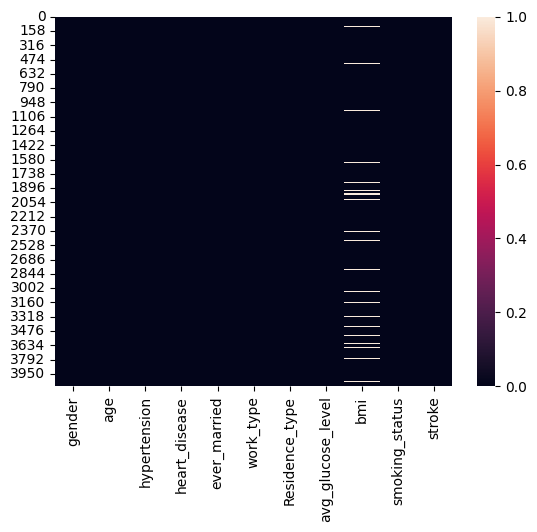

In [639]:
sn.heatmap(data.isna())

In [640]:
data['bmi']=data['bmi'].fillna(data['bmi'].mean())

In [641]:
new_gender=pn.get_dummies(data['gender'] )
new_gender


,Female,Male,Other
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
4083,1,0,0
4084,1,0,0
4085,0,1,0
4086,0,1,0


In [642]:
e_married=pn.get_dummies(data['ever_married'] )
e_married

,No,Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
4083,0,1
4084,0,1
4085,0,1
4086,1,0


In [643]:
w=pn.get_dummies(data['work_type']  )
w

,Govt_job,Never_worked,Private,Self-employed,children
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,1,0,0
...,...,...,...,...,...
4083,1,0,0,0,0
4084,0,0,1,0,0
4085,0,0,1,0,0
4086,0,0,1,0,0


In [644]:
r_type=pn.get_dummies(data['Residence_type'] )
r_type

,Rural,Urban
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
4083,1,0
4084,1,0
4085,1,0
4086,0,1


In [645]:
smoking_s=pn.get_dummies(data['smoking_status'] )
smoking_s


,Unknown,formerly smoked,never smoked,smokes
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,1,0,0
4,0,0,0,1
...,...,...,...,...
4083,0,0,0,1
4084,0,1,0,0
4085,0,0,0,1
4086,0,1,0,0


In [646]:
data=pn.concat([data ,new_gender,w,e_married,r_type,smoking_s] , axis=1 )


In [647]:
data.drop(['gender' , 'ever_married','Residence_type','smoking_status','Other' ,'work_type','never smoked' ,'Urban' ,'Female'  ,'No'] , axis=1 , inplace=True)

In [648]:
data.isna().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
Male                 0
Govt_job             0
Never_worked         0
Private              0
Self-employed        0
children             0
Yes                  0
Rural                0
Unknown              0
formerly smoked      0
smokes               0
dtype: int64

In [649]:
data.rename(columns={'Male' : 'gender' , 'Yes':'married'}, inplace=True)


In [650]:
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,Govt_job,Never_worked,Private,Self-employed,children,married,Rural,Unknown,formerly smoked,smokes
0,36.0,0,0,67.29,36.7,0,0,0,0,1,0,0,1,1,0,1,0
1,34.0,0,0,83.53,48.5,0,0,0,0,1,0,0,1,1,0,1,0
2,60.0,0,0,65.16,30.8,0,1,0,0,1,0,0,1,1,0,0,0
3,75.0,0,0,78.80,29.3,1,0,0,0,0,1,0,1,1,0,1,0
4,76.0,0,0,58.65,25.6,0,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,53.0,1,0,98.61,38.8,0,0,1,0,0,0,0,1,1,0,0,1
4084,61.0,0,0,72.01,26.0,0,0,0,0,1,0,0,1,1,0,1,0
4085,44.0,0,0,94.71,28.4,0,1,0,0,1,0,0,1,1,0,0,1
4086,21.0,0,0,120.94,29.7,0,1,0,0,1,0,0,0,0,0,1,0


In [651]:
X=data.drop('stroke' ,axis=1)
y=data['stroke']

In [652]:
X_train , X_test , y_train , y_test =train_test_split(X,y,test_size=0.3 , random_state=2)

In [653]:
from sklearn.ensemble import RandomForestRegressor

In [654]:
np.random.seed(42)
model=RandomForestRegressor(n_estimators=1 ,random_state=1)
model.fit(X_train , y_train)


RandomForestRegressor(n_estimators=1, random_state=1)

In [656]:
predectt=model.predict(X_test)

In [657]:
confusion_matrix(y_test , predectt)


array([[1106,   56],
       [  54,   11]])

In [658]:
data_test=pn.read_csv('/content/test.csv')
id=data_test['id']
data_test=data_test.drop("id" ,axis=1)
data_test['bmi']=data_test['bmi'].fillna(data_test['bmi'].mean())
new_gender=pn.get_dummies(data_test['gender'] )
e_married=pn.get_dummies(data_test['ever_married'] )
w=pn.get_dummies(data_test['work_type']  )
r_type=pn.get_dummies(data_test['Residence_type'] )
smoking_s=pn.get_dummies(data_test['smoking_status'] )

In [659]:
data_test=pn.concat([data_test ,new_gender,w,e_married,r_type,smoking_s] , axis=1 )

In [660]:
data_test.drop(['gender' , 'ever_married','Residence_type','smoking_status','work_type','never smoked','Urban' , 'Female'  ,'No'] , axis=1 , inplace=True)

In [661]:
data_test.rename(columns={'Male' : 'gender' , 'Yes':'married'}, inplace=True)


In [662]:
yy=model.predict(data_test)

id=np.arange(len(predectt))
d=pn.d

In [664]:
##id=np.arange(len(predectt))
d=pn.DataFrame({'id':id , 'stroke':yy})


In [665]:
d.to_csv('predecty.csv', index=False)
pred1=pn.read_csv('predecty.csv')



In [666]:
pred1

,id,stroke
0,61960,1.0
1,31741,0.0
2,59451,0.0
3,40670,0.0
4,25391,0.0
...,...,...
1017,2953,0.0
1018,47799,0.0
1019,61013,0.0
1020,66400,1.0
